･ (Period to calculate initial phase)		=  1e-10  ~  3e-10 [s]
･ (Acceptable switch timing delay)		=  1.8e-10 [s]
･ (Interval between input SFQ or HFQ pulses)	=  5e-10 [s]
[]
Simulate with default values.
Using default parameters


100%|██████████| 4/4 [00:14<00:00,  3.62s/it]


,low(value),low(%),high(value),high(%)
JTLL,2.488281,-64.453125,14.000000,100.00000
SQUIDL,0.312500,-68.750000,1.992188,99.21875
JTLR,96.484375,-62.890625,428.593750,64.84375
SQUIDJJ,0.423828,-39.453125,0.989844,41.40625


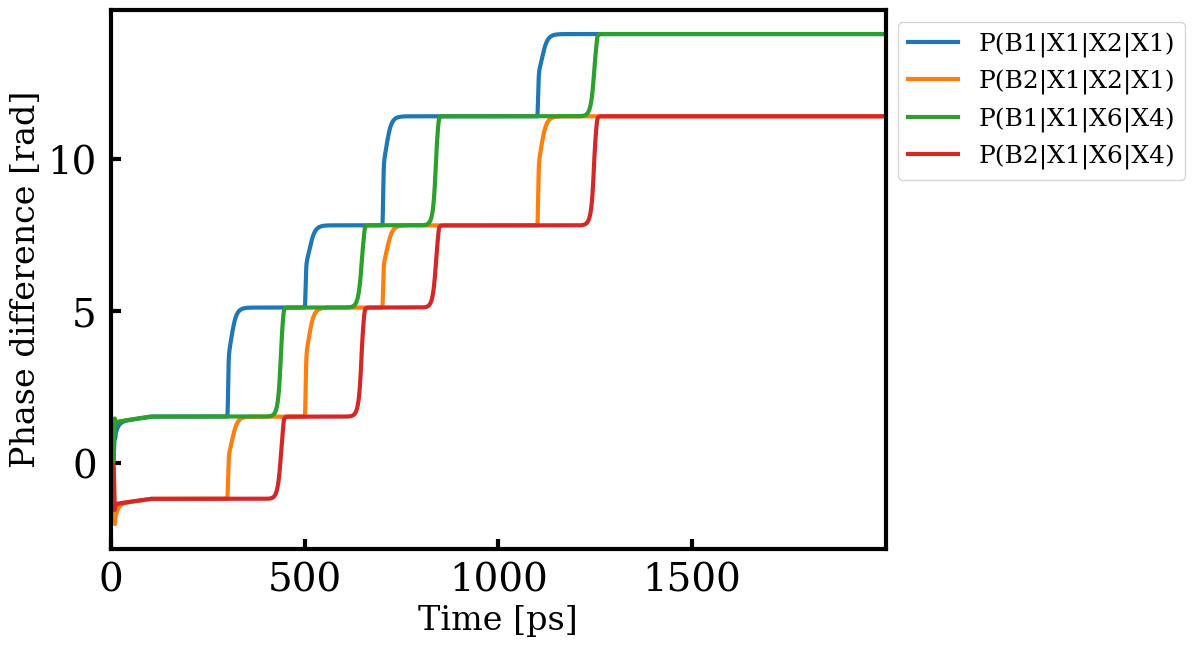

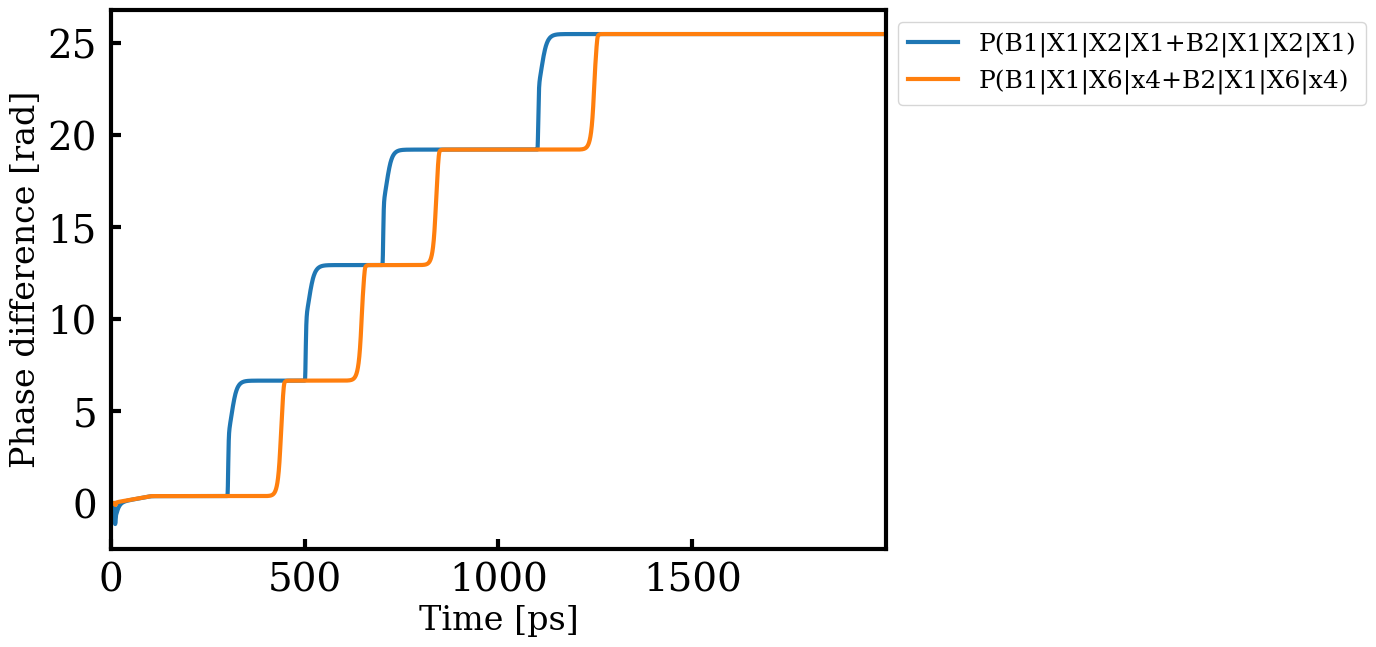

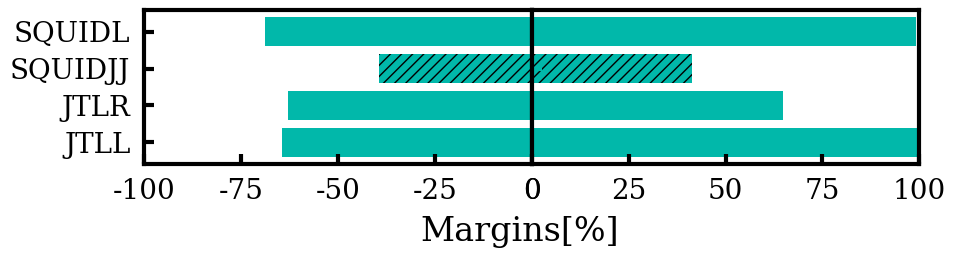

In [1]:
netlist="""

.model jjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA)
.model pjjmod jj(Rtype=1, Vg=2.8mV, Cap=0.064pF, R0=100ohm, Rn=16ohm, Icrit=0.1mA, PHI=PI)


.subckt jtl_squid   3       5 
L1                  3       1   #SQUIDL(1)pH fcheck
L2                  3       4   #SQUIDL(1)pH fcheck
B1                  1       5   jjmod area=#SQUIDJJ(0.7)
R1                  1       5   15.7ohm 
B2                  2       5   jjmod area=#SQUIDJJ(0.7)
R2                  2       5   15.7ohm
B3                  4       2   pjjmod area=20
R3                  4       2   0.39ohm
.ends

.subckt jtl_base        1       2       100
X1      jtl_squid       1       0
R1                      1       100     #JTLR(260)ohm
L1                      1       2       #JTLL(7)pH
.ends

.subckt jtl_base8       1       9       100
X1      jtl_base        1       2       100
X2      jtl_base        2       3       100
X3      jtl_base        3       4       100
X4      jtl_base        4       5       100
X5      jtl_base        5       6       100
X6      jtl_base        6       7       100
X7      jtl_base        7       8       100
X8      jtl_base        8       9       100
.ends

* Example JTL Basic
VIN                     1       0       pwl(0 0 300p 0 301p 0.5175mV 302p 0.5175mV 303p 0  500p 0 501p 0.5175mV 502p 0.5175mV 503p 0  700p 0 701p 0.5175mV 702p 0.5175mV 703p 0  1100p 0 1101p 0.5175mV 1102p 0.5175mV 1103p 0)
R1                      1       11      1ohm
X1      jtl_base8       11      12      100        
X2      jtl_base8       12      13      100   
X3      jtl_base8       13      14      100   
X4      jtl_base8       14      15      100   
R5                      15      16      8.32ohm
L1                      16      0       2pH
Vb                      100     0       pwl(0ps 0mV 100ps 1.5mV)

.tran 0.1p 2000p 0p

*.print devv R1

*.print PHASE B1|X1|X2|X1
*.print PHASE B2|X1|X2|X1
*.print PHASE B3|X1|X2|X1

*.print devv B1|X1|X2|X1
*.print devv B2|X1|X2|X1
*.print devv B3|X1|X2|X1


*.print PHASE B1|X1|X6|x4
*.print PHASE B2|X1|X6|x4
*.print PHASE B3|X1|X6|x4

*.print devv B1|X1|X6|x4
*.print devv B2|X1|X6|x4
*.print devv B3|X1|X6|x4

.print devv B1|X1|X6|x4
.end
"""

config_data = {
    "avgcalc.start.time":100e-12,
    "avgcalc.end.time":300e-12,
    "pulse.delay":180e-12,
    "pulse.interval": 500e-12,
    "phase.ele": [["B1|X1|X2|X1","B2|X1|X2|X1"],["B1|X1|X6|x4","B2|X1|X6|x4"]],
    "voltage.ele" : [],
    "allow.multi.swithes" : False
}

from hfqco import data, util
import importlib
importlib.reload(data)
importlib.reload(util)

d = data.Data(netlist, config_data)
# d.data_simulation()
d.get_base_switch_timing()
d.get_margins()